In [42]:
import matplotlib.pyplot as plt
import random
import numpy as np
import simulated_annealing as sa

In [ ]:
import importlib
importlib.reload(sa)

In [ ]:
def generate_uniform_points(n, a = 200):
    points = []
    a /= 2
    for _ in range(n):
        points.append((random.uniform(-a, a), random.uniform(-a, a)))
    return points


def generate_four_groups_of_points(n, a = 200):
    a /= 2
    points = [(-a, -a), (a, -a), (-a, a), (a, a)]
    for _ in range(n):
        i = random.randint(0, 3)
        if i == 1:
            points.append((np.random.normal(points[i][0], a/6), np.random.normal(points[i][1], a/6)))
        elif i == 2:
            points.append((np.random.normal(points[i][0], a/6), np.random.normal(points[i][1], a/6)))
        elif i == 3:
            points.append((np.random.normal(points[i][0], a/6), np.random.normal(points[i][1], a/6)))
        else:
            points.append((np.random.normal(points[i][0], a/6), np.random.normal(points[i][1], a/6)))

    return points


def generate_nine_groups_of_points(n, a = 200):
    a /= 2
    d = 20
    points = [(random.uniform(-a, a), random.uniform(-a, a)) for _ in range(9)]
    for _ in range(n):
        i = random.randint(0, 8)
        match i:
            case 0:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 1:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 2:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 3:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 4:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 5:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 6:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 7:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))
            case 8:
                points.append((np.random.normal(points[i][0], a/d), np.random.normal(points[i][1], a/d)))


    return points

In [ ]:
def solve_and_draw_como_voyager(points, pos_func, max_temp, min_temp, temp_func):
    all_answers, temp = solve_como_voyager_using_sa(points, pos_func, max_temp, min_temp, temp_func)
    tab_px = []
    tab_py = []
    for ans in all_answers:
        solved_pointsx = []
        solved_pointsy = []
        for i in ans:
            solved_pointsx.append(points[i][0])
            solved_pointsy.append(points[i][1])
        solved_pointsx.append(points[ans[0]][0])
        solved_pointsy.append(points[ans[0]][1])
        tab_px.append(solved_pointsx)
        tab_py.append(solved_pointsy)

    print("Parameters used here:")
    print(f"")
    print("Temperature function:")
    draw_temp_func(temp)

    for i in range(len(tab_px)):
        print(f"distance: {distance(all_answers[i])}")
        plt.scatter(tab_px[i], tab_py[i])
        plt.plot(tab_px[i], tab_py[i])
        plt.show()


def solve_como_voyager_using_sa(points, pos_func, max_temp, min_temp, temp_func):
    # pos_func = mixed_switch
    # max_temp = 500
    # min_temp = 5
    # temp_func = lambda x: x*0.997
    temps = sa.generate_temp_tab(max_temp, min_temp, temp_func)
    start_pos = [i for i in range(len(points))]
    cost_func = distance
    ans = start_pos
    all_answers = [ans]
    for _ in range(100):
        temp = sa.simulated_annealing(temps, start_pos, cost_func, pos_func)
        if cost_func(ans) > temp[1]:
            ans = temp[0]
            all_answers.append(ans)
    # return ans, all_answers
    return all_answers, temps


def switch_adjacent_points(points):
    tab = points[:]
    n = len(tab)
    point1 = random.randint(0, n - 1)
    point2 = (random.choice((-1, 1)) + point1) % n
    tab[point1], tab[point2] = tab[point2], tab[point1]
    return tab

def switch_random_points(points):
    tab = points[:]
    n = len(points)
    point1 = random.randint(0, n - 1)
    point2 = random.randint(0, n - 1)
    while point1 == point2:
        point2 = random.randint(0, n - 1)
    tab[point1], tab[point2] = tab[point2], tab[point1]
    return tab

def mixed_switch(points):
    x = random.randint(1, 100)
    if x > 50:
        return switch_random_points(points)
    else:
        return switch_adjacent_points(points)

def distance(order = None):
    if order is None:
        order = [i for i in range(len(points))]
    dist = 0
    for i in range(len(order)):
        dx = abs(points[order[i]][0] - points[order[i - 1]][0])
        dy = abs(points[order[i]][1] - points[order[i - 1]][1])
        d = (dx ** 2 + dy ** 2) ** 0.5
        dist += d
    return dist

def draw_temp_func(temps):
    x = [i for i in range(0, len(temps), 5)]
    y = []
    for i in x:
        y.append(temps[i])
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.show()

## Generate group of points

In [30]:
number_of_points = 30

In [ ]:
points = generate_uniform_points(number_of_points)

In [ ]:
points = generate_four_groups_of_points(number_of_points)

In [31]:
points = generate_nine_groups_of_points(number_of_points)

# Prepared sets of parameters to test

In [34]:
pos_func = switch_random_points
max_temp = 500
min_temp = 5
temp_func = lambda x: x*0.99

In [ ]:
pos_func = switch_adjacent_points
max_temp = 500
min_temp = 5
temp_func = lambda x: x*0.99

In [ ]:
pos_func = mixed_switch
max_temp = 500
min_temp = 5
temp_func = lambda x: x*0.99

In [ ]:
pos_func = switch_random_points
max_temp = 500
min_temp = 5
temp_func = lambda x: x-1

In [ ]:
pos_func = switch_adjacent_points
max_temp = 500
min_temp = 5
temp_func = lambda x: x-1

In [ ]:
pos_func = mixed_switch
max_temp = 500
min_temp = 5
temp_func = lambda x: x-1

In [36]:
pos_func = switch_random_points
max_temp = 500
min_temp = 5
temp_func = lambda x: x*0.997

In [ ]:
pos_func = switch_adjacent_points
max_temp = 500
min_temp = 5
temp_func = lambda x: x*0.997

In [38]:
pos_func = mixed_switch
max_temp = 500
min_temp = 5
temp_func = lambda x: x*0.997

Temperature function:


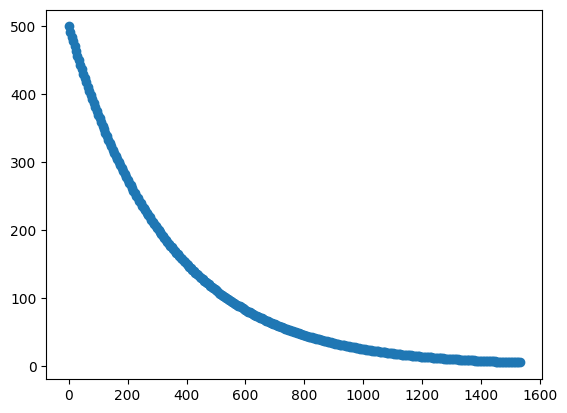

distance: 3442.1923482601715


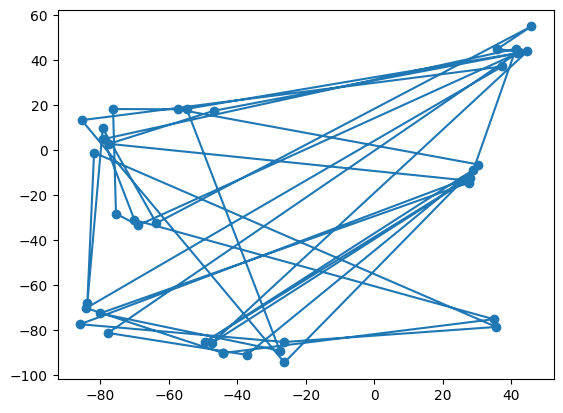

distance: 1075.6232914559982


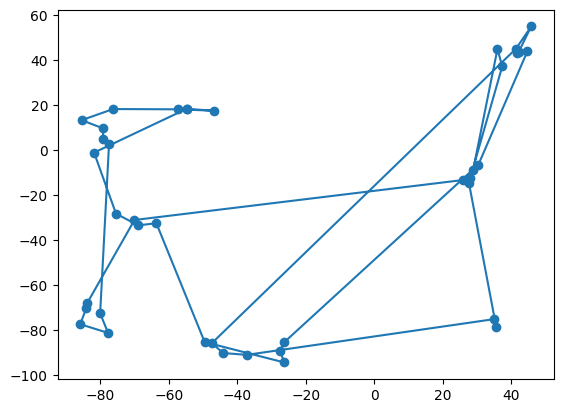

distance: 853.3778182519376


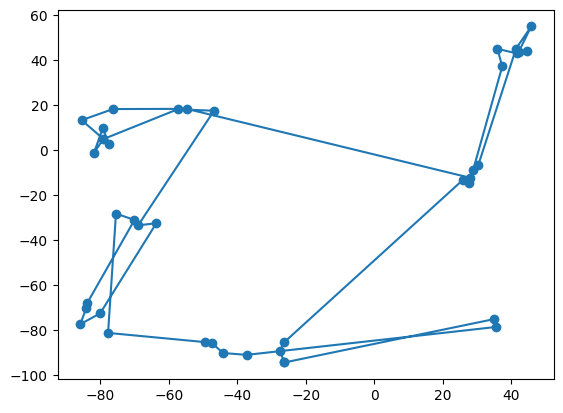

distance: 738.7309819430238


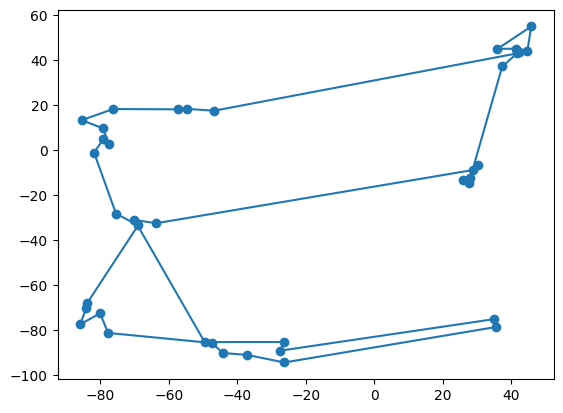

distance: 717.0743291704883


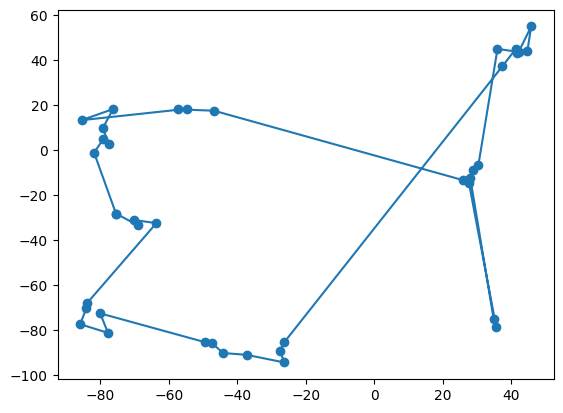

distance: 707.2390971758558


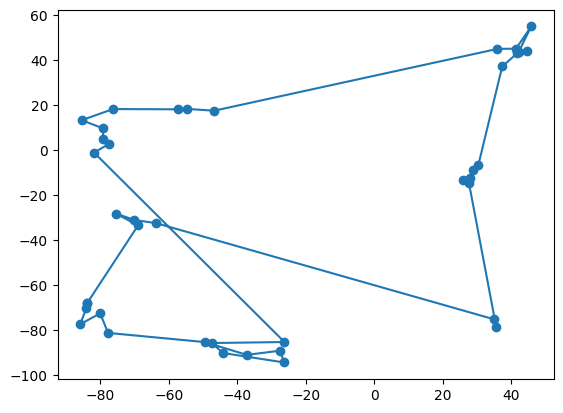

distance: 621.7270877374433


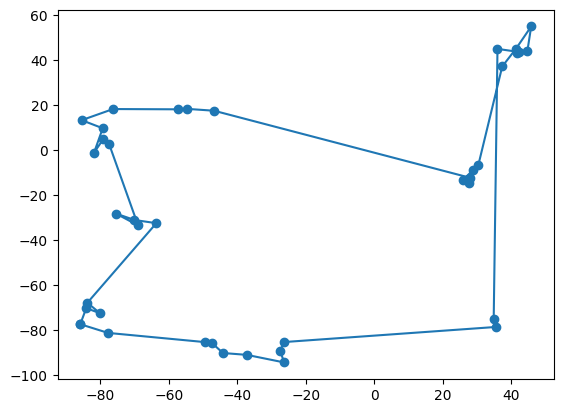

In [39]:
solve_and_draw_como_voyager(points, pos_func, max_temp, min_temp, temp_func)